practical no - 7\
Logistic Regression\
Sumeet shinde T116



In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt



In [16]:
url = "/content/BankNote_Authentication.csv"

df = pd.read_csv(url, skiprows=1, header=None)
df.columns = ["Variance", "Skewness", "Curtosis", "Entropy", "Class"]

print(df.head())

   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [10]:
X = df.drop("Class", axis=1)
y = df["Class"]


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
y_pred = log_reg.predict(X_test_scaled)

In [18]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [12]:
print("\n--- Evaluation Metrics ---\n")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


--- Evaluation Metrics ---

Accuracy : 0.9781553398058253
Precision: 0.953125
Recall   : 1.0
F1 Score : 0.976

Confusion Matrix:
 [[220   9]
 [  0 183]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       229
           1       0.95      1.00      0.98       183

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



In [11]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)

print("\n--- Feature Importance (Coefficients) ---\n")
print(coef_df)


--- Feature Importance (Coefficients) ---

    Feature  Coefficient
1  Skewness    -4.553968
0  Variance    -4.543198
2  Curtosis    -4.231474
3   Entropy     0.177372


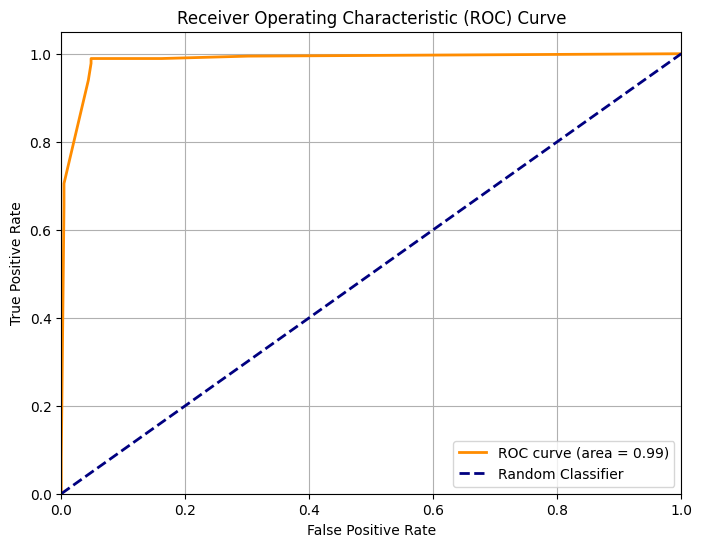

In [23]:
from sklearn.metrics import roc_curve, auc

# Generate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


--- Evaluation Metrics ---

Accuracy : 0.9635922330097088
Precision: 0.9421052631578948
Recall   : 0.9781420765027322
F1 Score : 0.9597855227882037

Confusion Matrix:
 [[218  11]
 [  4 179]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       229
           1       0.94      0.98      0.96       183

    accuracy                           0.96       412
   macro avg       0.96      0.97      0.96       412
weighted avg       0.96      0.96      0.96       412



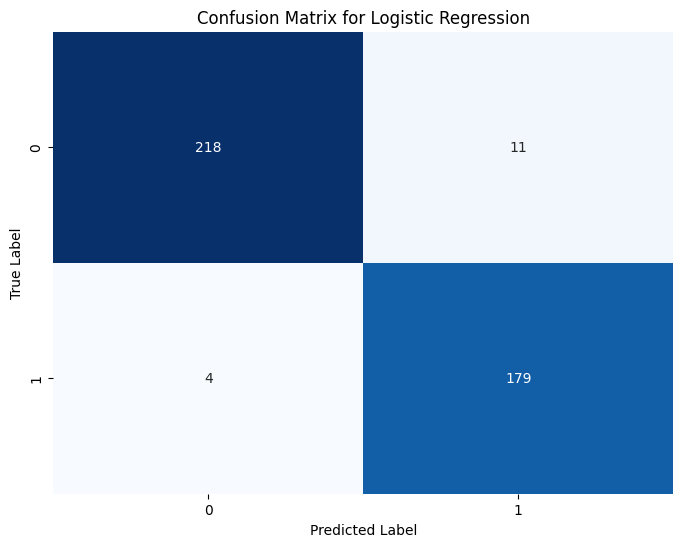

In [22]:
import seaborn as sns

print("\n--- Evaluation Metrics ---\n")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

 Decision Tree


In [38]:
# Decision Tree on Banknote Authentication Dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt


In [37]:
url = "/content/BankNote_Authentication.csv"
df = pd.read_csv(url, skiprows=1, header=None)
df.columns = ["Variance", "Skewness", "Curtosis", "Entropy", "Class"]
print("Dataset shape:", df.shape)
display(df.head())

Dataset shape: (1372, 5)


,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [36]:
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

In [35]:
dt = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_leaf=10)
dt.fit(X_train, y_train)

# 4) Predictions & probabilities
y_pred = dt.predict(X_test)
y_proba = dt.predict_proba(X_test)[:, 1]

In [34]:
print("\n--- Evaluation Metrics (Decision Tree) ---")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


--- Evaluation Metrics (Decision Tree) ---
Accuracy : 0.9635922330097088
Precision: 0.9421052631578948
Recall   : 0.9781420765027322
F1 Score : 0.9597855227882037

Confusion Matrix:
 [[218  11]
 [  4 179]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       229
           1       0.94      0.98      0.96       183

    accuracy                           0.96       412
   macro avg       0.96      0.97      0.96       412
weighted avg       0.96      0.96      0.96       412



In [30]:
try:
    auc = roc_auc_score(y_test, y_proba)
    print("ROC AUC  :", round(auc, 4))
except Exception as e:
    print("ROC AUC could not be computed:", e)


ROC AUC  : 0.9858


In [33]:
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": dt.feature_importances_
}).sort_values(by="Importance", ascending=False)
print("\n--- Feature Importances ---")
display(feat_imp)


--- Feature Importances ---


,Feature,Importance
0,Variance,0.0
1,Skewness,0.0
2,Curtosis,0.0
3,Entropy,0.0


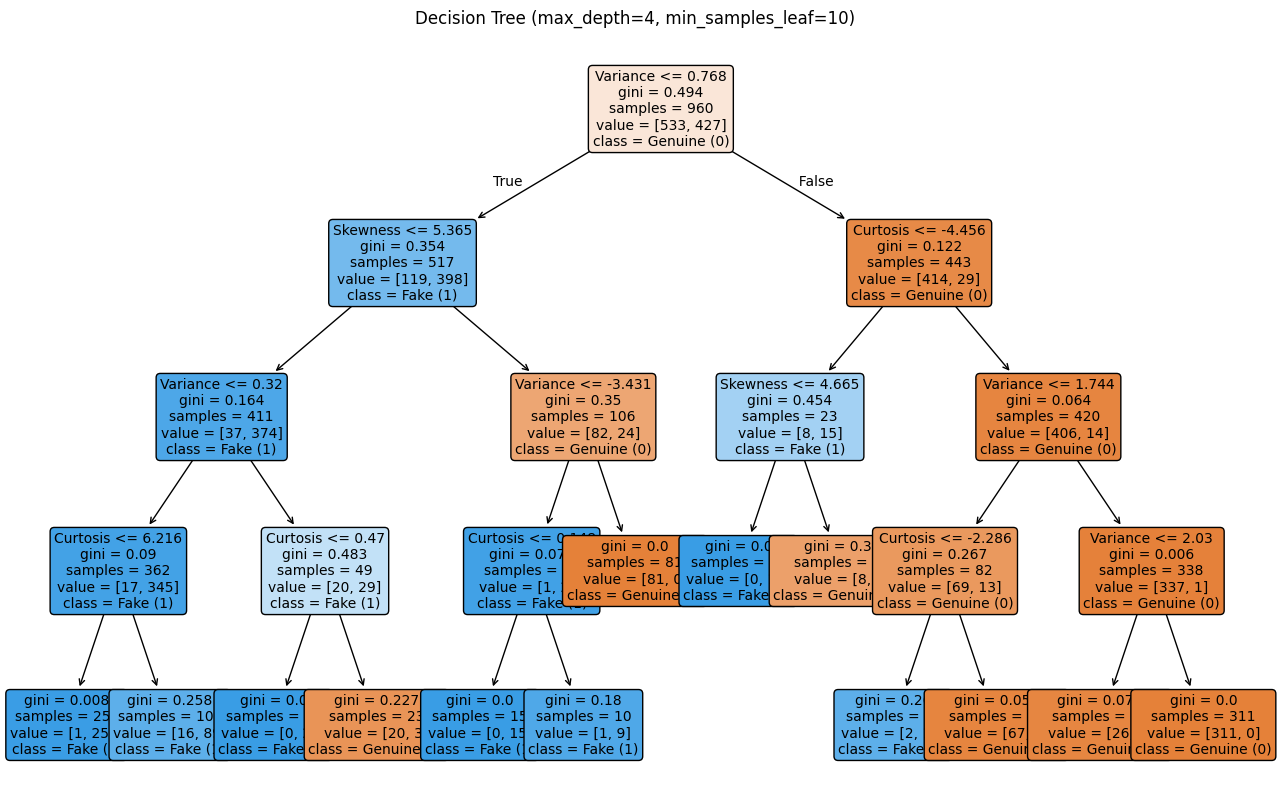

In [49]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(16,10))
tree.plot_tree(dt,
          feature_names=X.columns,
          class_names=["Genuine (0)", "Fake (1)"],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree (max_depth=4, min_samples_leaf=10)")
plt.show()

In [31]:
example_idx = 0
print("\nExample test row (index {}):".format(example_idx))
display(X_test.reset_index(drop=True).loc[example_idx:example_idx])
print("True label:", y_test.reset_index(drop=True).loc[example_idx])
print("Predicted label:", y_pred[example_idx], " Predicted prob (fake):", round(y_proba[example_idx],3))



Example test row (index 0):


,Variance,Skewness,Curtosis,Entropy
0,4.7432,2.1086,0.1368,1.6543


True label: 0
Predicted label: 0  Predicted prob (fake): 0.0


In [42]:
predictions_train = dt.predict(X_train)

print("\n--- Test Set Evaluation ---\n")
print(classification_report(y_test, y_pred)) # Use y_pred for test predictions
print(confusion_matrix(y_test, y_pred))



--- Test Set Evaluation ---

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       229
           1       0.94      0.98      0.96       183

    accuracy                           0.96       412
   macro avg       0.96      0.97      0.96       412
weighted avg       0.96      0.96      0.96       412

[[218  11]
 [  4 179]]


In [43]:
print("\n--- Train Set Evaluation ---\n")
print(classification_report(y_train, predictions_train))
print(confusion_matrix(y_train, predictions_train))


--- Train Set Evaluation ---

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       533
           1       0.95      0.98      0.97       427

    accuracy                           0.97       960
   macro avg       0.97      0.97      0.97       960
weighted avg       0.97      0.97      0.97       960

[[513  20]
 [  8 419]]


FPR : [0.         0.         0.00436681 0.00436681 0.04366812 0.04803493
 0.04803493 0.10043668 0.16157205 0.30131004 1.        ]
TPR : [0.         0.08196721 0.6557377  0.70491803 0.93989071 0.97814208
 0.98907104 0.98907104 0.98907104 0.99453552 1.        ]
Threshold : [       inf 1.         0.99610895 0.9        0.84761905 0.84615385
 0.2        0.13043478 0.03703704 0.02898551 0.        ]
AUC Score (Decision Tree): 0.9857899634905863


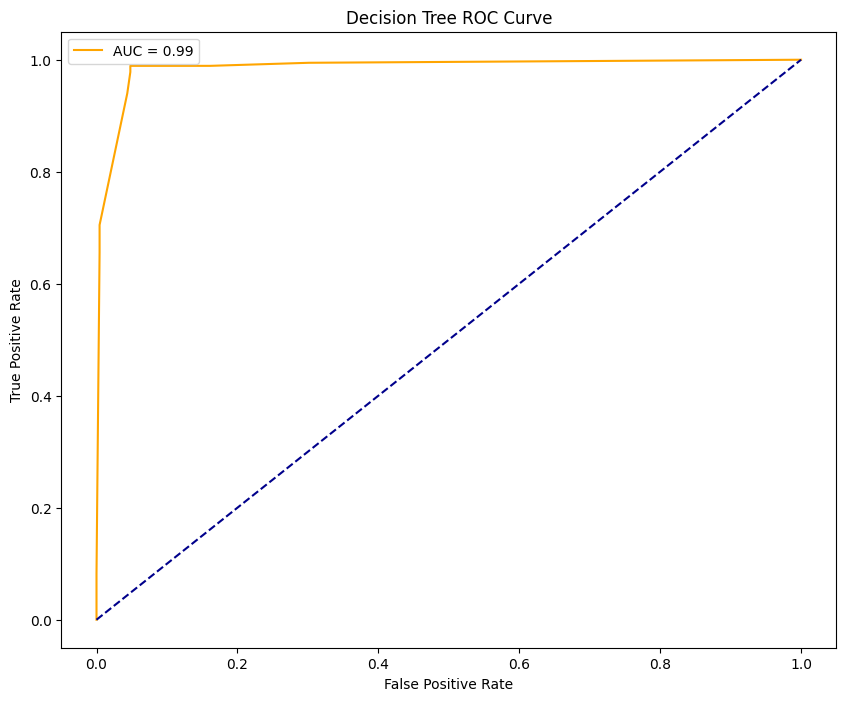

In [46]:
from sklearn.metrics import roc_curve, auc # Explicitly import auc here to avoid shadowing

dt_probs = dt.predict_proba(X_test)[:, 1] # Use dt for Decision Tree model
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs) # Corrected to use dt_probs
print("FPR :", fpr_dt)
print("TPR :", tpr_dt)
print("Threshold :", thresholds_dt)
auc_score_dt = auc(fpr_dt, tpr_dt)
print("AUC Score (Decision Tree):", auc_score_dt)

def plot_roc_curve(fpr, tpr, auc_score, title="Receiver Operating Characteristic (ROC) Curve"):
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='orange', label='AUC = %0.2f' % auc_score)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

plot_roc_curve(fpr_dt, tpr_dt, auc_score_dt, title="Decision Tree ROC Curve")

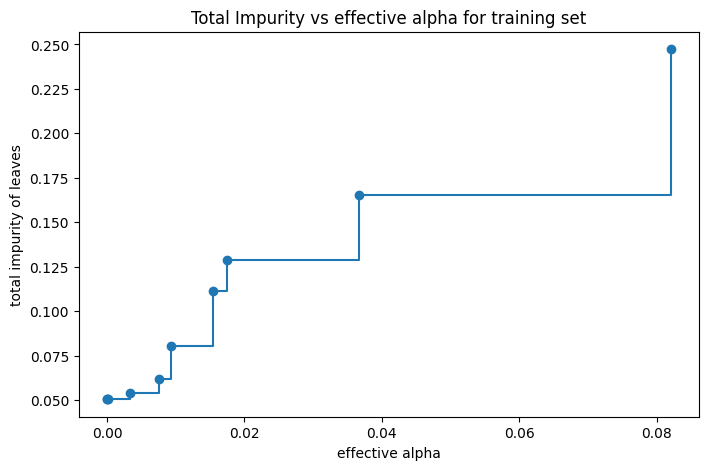

Number of nodes in the last tree is: 3 with ccp_alpha: 0.24658977888584277


In [47]:
# Ensure 'dt' (DecisionTreeClassifier) is already defined from a previous cell (BEkEamomG7hy)
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

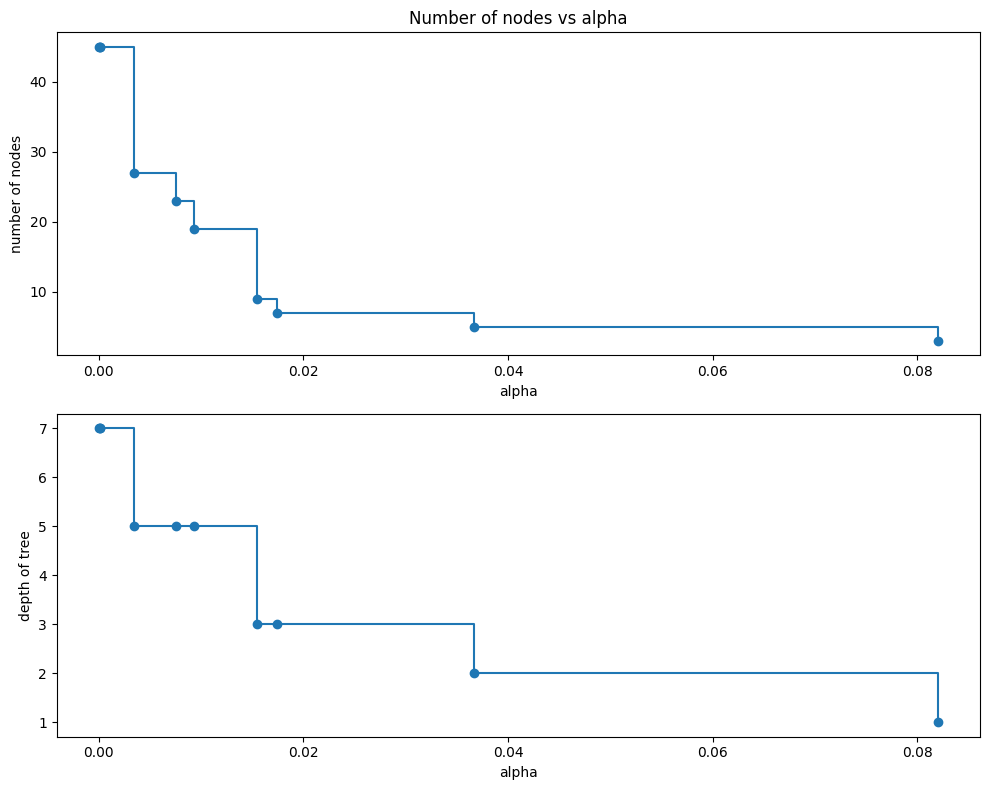

In [48]:
# Ensure clfs and ccp_alphas are not empty before slicing
if len(clfs) > 1 and len(ccp_alphas) > 1:
    clfs = clfs[:-1]
    ccp_alphas = ccp_alphas[:-1]

    node_counts = [clf.tree_.node_count for clf in clfs]
    depth = [clf.tree_.max_depth for clf in clfs]
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
    ax[0].set_xlabel("alpha")
    ax[0].set_ylabel("number of nodes")
    ax[0].set_title("Number of nodes vs alpha")
    ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
    ax[1].set_xlabel("alpha")
    ax[1].set_ylabel("depth of tree")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough data for pruning analysis plots after removing the last alpha.")